In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./Student_depression_dataset.csv")


#Dropping the columnms that we thought didn't seem fit
df.drop(columns=['Work Pressure'], inplace=True)
df.drop(columns=['Job Satisfaction'], inplace=True)
df.drop(columns=['Degree'], inplace=True)
df.drop(columns=['City'], inplace=True)


sleep_mapping = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9
}

binary_mapping = {"Yes": 1, "No": 0}


df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].str.strip().map(binary_mapping)


df["Family History of Mental Illness"] = df["Family History of Mental Illness"].str.strip().map(binary_mapping)

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

dietary_mapping = {"Healthy": 1, "Moderate": 2, "Others": 3, "Unhealthy": 4}
df["Dietary Habits"] = df["Dietary Habits"].map(dietary_mapping)

print(df.head())




   id  Gender   Age Profession  Academic Pressure  CGPA  Study Satisfaction  \
0   2    Male  33.0    Student                5.0  8.97                 2.0   
1   8  Female  24.0    Student                2.0  5.90                 5.0   
2  26    Male  31.0    Student                3.0  7.03                 5.0   
3  30  Female  28.0    Student                3.0  5.59                 2.0   
4  32  Female  25.0    Student                4.0  8.13                 3.0   

   Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
0             5.5               1                                      1   
1             5.5               2                                      0   
2             4.0               1                                      0   
3             7.5               2                                      1   
4             5.5               2                                      1   

   Work/Study Hours  Financial Stress  Family History of Mental Illn

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Sleep Duration                         27883 non-null  float64
 8   Dietary Habits                         27901 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [5]:
print("\nSummary Statistics:")
print(df.describe())


 
# Checking For missing values
print("\nMissing Values:")
print(df.isnull().sum())




Summary Statistics:
                  id           Age  Academic Pressure          CGPA  \
count   27901.000000  27901.000000       27901.000000  27901.000000   
mean    70442.149421     25.822300           3.141214      7.656104   
std     40641.175216      4.905687           1.381465      1.470707   
min         2.000000     18.000000           0.000000      0.000000   
25%     35039.000000     21.000000           2.000000      6.290000   
50%     70684.000000     25.000000           3.000000      7.770000   
75%    105818.000000     30.000000           4.000000      8.920000   
max    140699.000000     59.000000           5.000000     10.000000   

       Study Satisfaction  Sleep Duration  Dietary Habits  \
count        27901.000000     27883.00000    27901.000000   
mean             2.943837         6.33854        2.465754   
std              1.361148         1.91748        1.239704   
min              0.000000         4.00000        1.000000   
25%              2.000000         

In [7]:

# Filling in the missing values with the median
median_financial_stress = df['Financial Stress'].median()
df['Financial Stress'] = df['Financial Stress'].fillna(median_financial_stress)


median_sleep = df['Sleep Duration'].median()
df['Sleep Duration'] = df['Sleep Duration'].fillna(median_sleep)


#checking for missing values after update
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
id                                       0
Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [9]:
# Reading the data we found out that  dietary habit 3 is making noise since only 12 people had that. Combined it with dietary habit 4 to reduce noise. 
#Also, we figured out for Academic Pressure that 0 only had 4 people sice we decided to combine it with 1 to reduce noise as well. We did this while training the model
#but it's more ogranized to put it up here so when we train the model data is perfected.

print(df['Dietary Habits'].value_counts())


# Check unique values before merging
print("Before merging, Dietary Habits categories:", df['Dietary Habits'].unique())

# Merge category 3 into category 4
df['Dietary Habits'] = df['Dietary Habits'].replace({0: 1})

# Check unique values after merging
print("After merging, Dietary Habits categories:", df['Dietary Habits'].unique())



print("Before merging, Academic Pressure:", df['Academic Pressure'].unique())

df['Academic Pressure'] = df['Academic Pressure'].replace({0: 1})

print("After merging, Academic Pressure categories:", df['Academic Pressure'].unique())


Dietary Habits
4    10317
2     9921
1     7651
3       12
Name: count, dtype: int64
Before merging, Dietary Habits categories: [1 2 4 3]
After merging, Dietary Habits categories: [1 2 4 3]
Before merging, Academic Pressure: [5. 2. 3. 4. 1. 0.]
After merging, Academic Pressure categories: [5. 2. 3. 4. 1.]


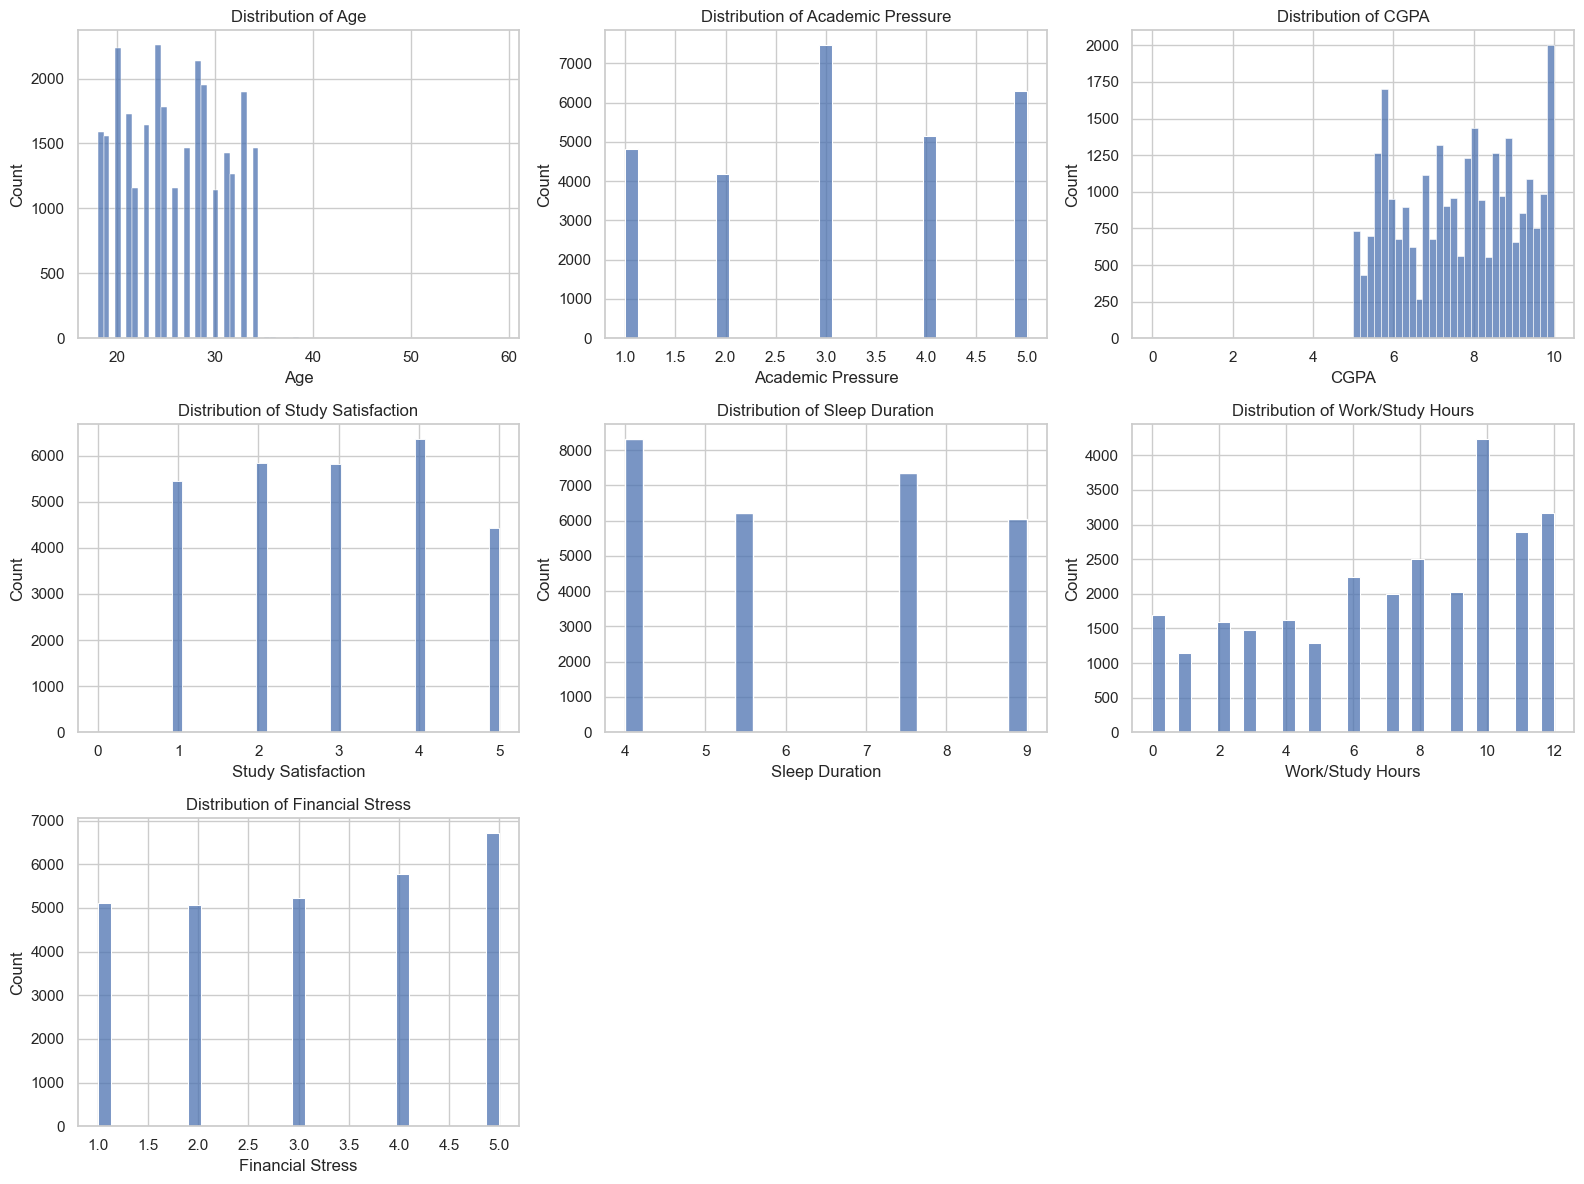

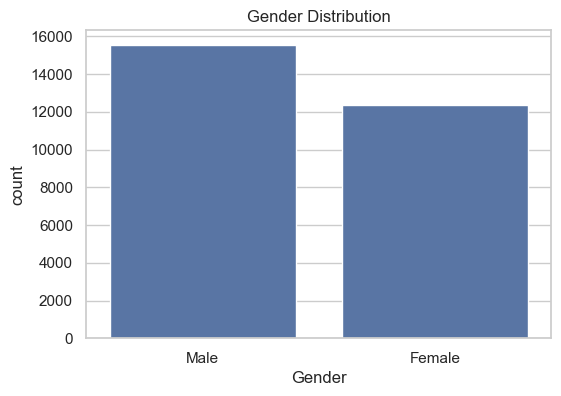

In [11]:
#2 Data Visualizatoin

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", context="notebook")

# List of all features we want to analyze
continuous_vars = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

# Plotting histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Bar plot for categorical variable, e.g., Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


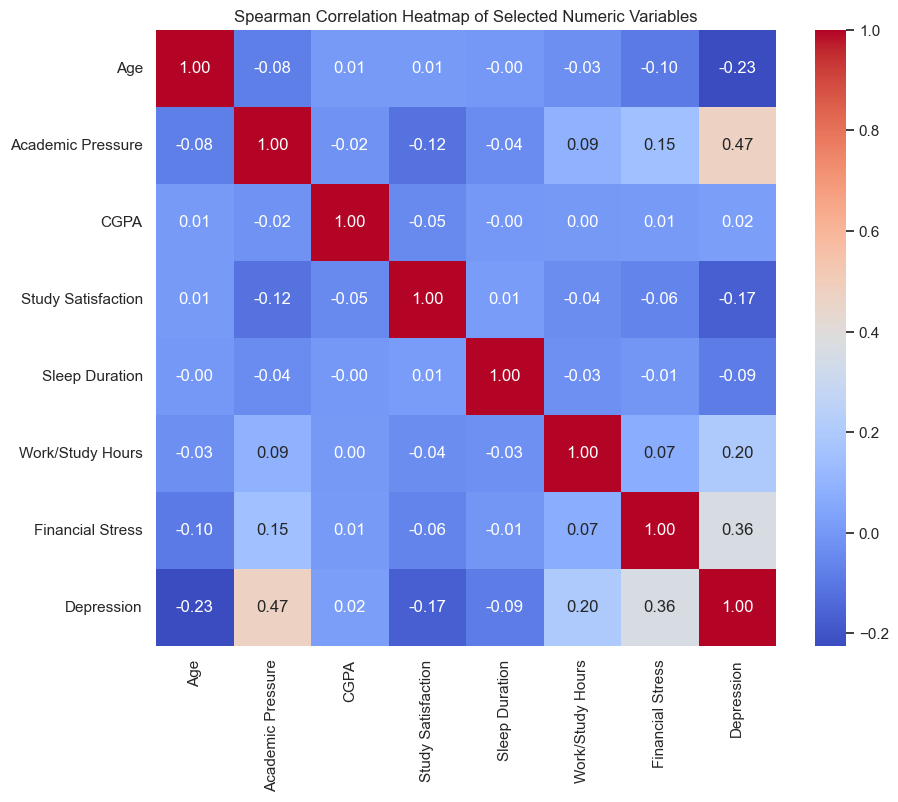

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# defining all columns that are numeric
numeric_cols = [
    'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 
     'Sleep Duration', 'Work/Study Hours', 
    'Financial Stress', 'Depression'
]

# Computing the Spearman correlation matrix
corr_matrix = df[numeric_cols].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap of Selected Numeric Variables")
plt.show()




<Figure size 800x600 with 0 Axes>

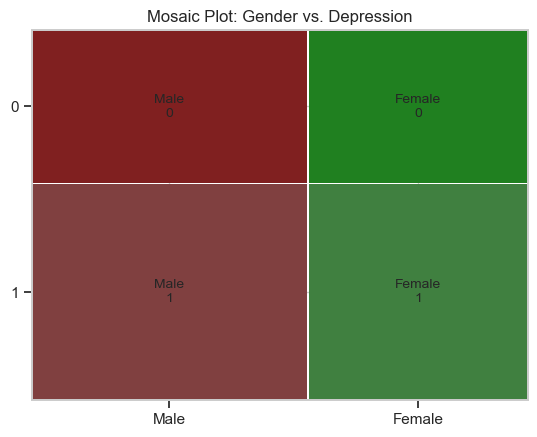

<Figure size 800x600 with 0 Axes>

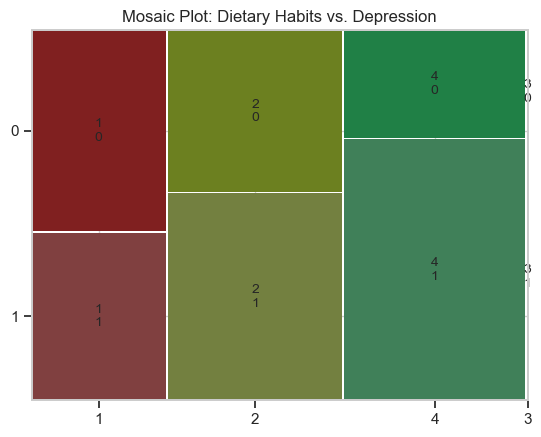

<Figure size 800x600 with 0 Axes>

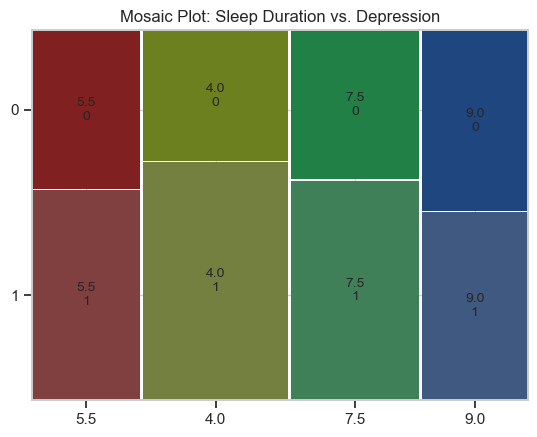

<Figure size 800x600 with 0 Axes>

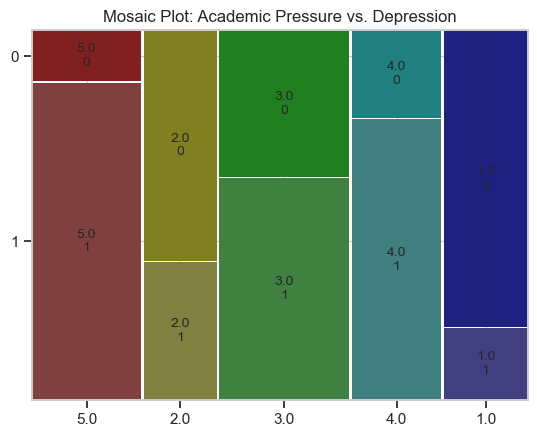

<Figure size 800x600 with 0 Axes>

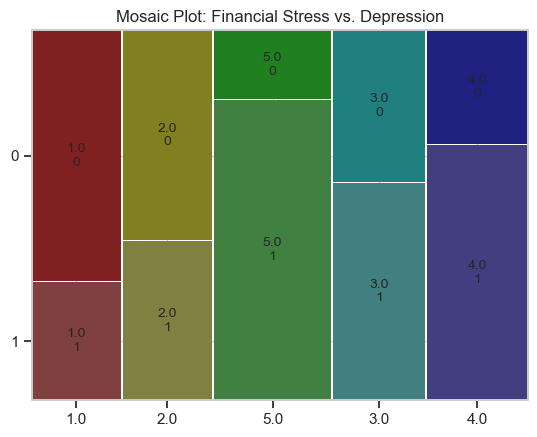

In [13]:
#Using mosaic plots to show the correlation between depresion and the feature. Its a good way of showing it to you without beign overwhelmed by writing.

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# List of categorical variables to analyze
categorical_vars = [
    'Gender','Dietary Habits',  
    'Sleep Duration', 'Academic Pressure','Financial Stress',
]

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    mosaic(df, [var, 'Depression'])
    plt.title(f'Mosaic Plot: {var} vs. Depression')
    plt.show()


In [14]:
#Anova 

import pandas as pd
import scipy.stats as stats


# Define the features for ANOVA
anova_features = ["Sleep Duration", "Dietary Habits", "Academic Pressure", "CGPA", "Work/Study Hours"]

anova_results = {}

# Looping over each feature and performing a one-way ANOVA comparing Depression groups
for feature in anova_features:
    # Create a list of arrays: one array per Depression group (0 and 1)
    groups = [df[df["Depression"] == d][feature].dropna() for d in df["Depression"].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = {"F-Statistic": f_stat, "P-Value": p_value}

# Convert the results to a DataFrame for easier viewing
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")
print("ANOVA Results:")
print(anova_df)

#Results: 

#Based on my ANOVA analysis, I found that Sleep Duration significantly differs between depressed and non-depressed groups (F=198.76, p<5.57e-45), which suggests a strong link with depression. Dietary Habits are even more impactful (F=1244, p<1.21e-266), highlighting their critical role. Academic Pressure shows an exceptionally high effect (F=8121.47, p≈0), making it a major differentiator. Although CGPA has a smaller effect (F=13.77, p=2.07e-04), it still matters. Finally, Work/Study Hours have a robust association (F=1268.75, p<8.60e-272), confirming that all these features are significant in distinguishing depression status.


ANOVA Results:
                   F-Statistic        P-Value
Sleep Duration      198.755039   5.572634e-45
Dietary Habits     1243.991939  1.211740e-266
Academic Pressure  8127.889070   0.000000e+00
CGPA                 13.769509   2.070646e-04
Work/Study Hours   1268.752140  8.598086e-272


In [15]:
#Chi Square 

import pandas as pd
import scipy.stats as stats

# List of categorical variables to test against Depression
categorical_vars = [
    'Gender', 'Dietary Habits',
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness', 'Sleep Duration'
]

for var in categorical_vars:
    print(f"Chi-square test for {var} vs. Depression:")
    contingency_table = pd.crosstab(df[var], df['Depression'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4e}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")

#Results:

#Based on my chi-square tests, Gender isn't significantly associated with depression (Chi²=0.0827, p≈0.77), which means there's no meaningful difference between males and females regarding depression. On the other hand, Dietary Habits show a very strong link (Chi²≈1202.64, p<1e-260), making them a critical factor. The test for "Have you ever had suicidal thoughts?" is extremely significant (Chi²≈8323.87, p≈0), underscoring its importance in predicting depression. Family History of Mental Illness also comes out significant (Chi²≈79.43, p<5e-19), and finally, Sleep Duration is notably associated with depression (Chi²≈276.32, p<1e-59). These results suggest that while Gender doesn't play a big role, Dietary Habits, suicidal thoughts, family history, and sleep patterns are all key predictors of depression.


Chi-square test for Gender vs. Depression:
Chi2 Statistic: 0.0827
P-value: 7.7373e-01
Degrees of Freedom: 1
Contingency Table:
Depression     0     1
Gender                
Female      5133  7221
Male        6432  9115


Chi-square test for Dietary Habits vs. Depression:
Chi2 Statistic: 1202.6382
P-value: 1.9625e-260
Degrees of Freedom: 3
Contingency Table:
Depression         0     1
Dietary Habits            
1               4178  3473
2               4363  5558
3                  4     8
4               3020  7297


Chi-square test for Have you ever had suicidal thoughts ? vs. Depression:
Chi2 Statistic: 8323.8664
P-value: 0.0000e+00
Degrees of Freedom: 1
Contingency Table:
Depression                                0      1
Have you ever had suicidal thoughts ?             
0                                      7866   2379
1                                      3699  13957


Chi-square test for Family History of Mental Illness vs. Depression:
Chi2 Statistic: 79.4344
P-value: 4.9850e

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Splitting data into target Matrix and target feature 
selected_features = [
    'Academic Pressure', 'Work/Study Hours', 'Financial Stress',
    'Dietary Habits', 'Sleep Duration', 'Family History of Mental Illness',
    'Have you ever had suicidal thoughts ?', 'CGPA', 'Gender'
]
X = df[selected_features].copy()
y = df['Depression']

# Distinguishing between continuos and categorical
continuous_features = ['Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Sleep Duration', 'CGPA']
categorical_features = ['Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?', 'Gender']

# Creating a pipeline for continuous features:
# 1. First we Scaled the features using StandardScaler to make sure that all datas are close to each other
# 2. We also applied PCA to reduce dimensionality while retaining 95% of the variance.

continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)) 
])

# Using one hot encoding for converting strings to integers
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine the pipelines using ColumnTransformer.
preprocessor = ColumnTransformer([
    ('cont', continuous_pipeline, continuous_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Creating the full pipeline with preprocessor and Logistic Regression.
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# This is a grid for hyperparameter tuning we made
# Here we also tuned the polynomial degree on continuous features.
param_grid = {
    'preprocessor__cont__pca__n_components': [0.90, 0.95, 0.99],  
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'], 
    'logreg__solver': ['liblinear', 'saga']
}

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# used GridSearchCV for hyperparameter tuning.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

# We first used 0.5 threshold which is the default
y_pred_default = grid_search.best_estimator_.predict(X_test)
print("\nLogistic Regression (with PCA) Test Results (Threshold=0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("F1 Score:", f1_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

#Changed the threshold to 0.39 since we want to increase recall. We made a ROC graph below to calculate the best threshold.
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
threshold = 0.395
y_pred_039 = (y_prob >= threshold).astype(int)

print(f"\nLogistic Regression (with PCA) Test Results (Threshold={threshold}):")
print("Accuracy:", accuracy_score(y_test, y_pred_039))
print("F1 Score:", f1_score(y_test, y_pred_039))
print(classification_report(y_test, y_pred_039))


Best parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'preprocessor__cont__pca__n_components': 0.9}
Best CV F1 Score: 0.8562131960855772

Logistic Regression (with PCA) Test Results (Threshold=0.5):
Accuracy: 0.8310338648987636
F1 Score: 0.8529090625487443
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2313
           1       0.87      0.84      0.85      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581


Logistic Regression (with PCA) Test Results (Threshold=0.395):
Accuracy: 0.8326464791256047
F1 Score: 0.8610945865556217
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2313
           1       0.84      0.89      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.82     

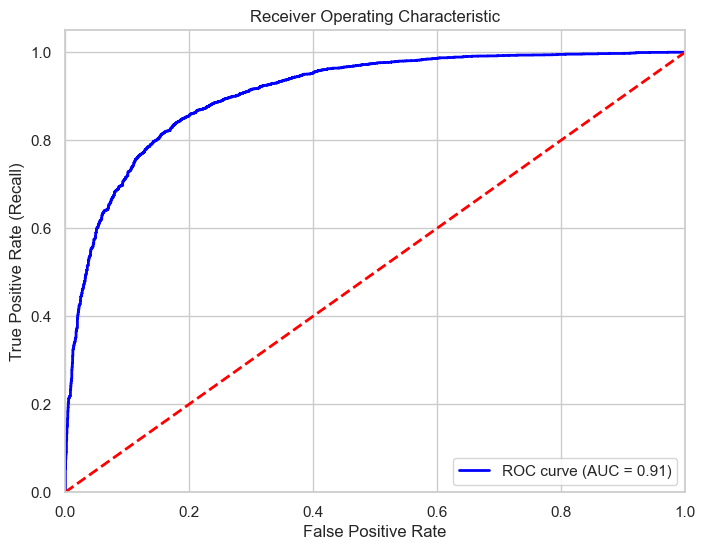

Optimal threshold (maximizing F1): 0.37353959913362006
At optimal threshold:
Precision: 0.8306337027564649
Recall: 0.8944308445532436
F1 Score: 0.8613525858258435


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score


y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Computing F1-score for each threshold, then selecting the threshold that maximizes F1.
f1_scores = []
for t in thresholds:
    y_pred_temp = (y_prob >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_temp))

optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal threshold (maximizing F1):", optimal_threshold)

# Checking precision and recall at the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
f1_opt = f1_score(y_test, y_pred_optimal)

print("At optimal threshold:")
print("Precision:", precision_opt)
print("Recall:", recall_opt)
print("F1 Score:", f1_opt)


Confusion Matrix:
[[1752  561]
 [ 373 2895]]


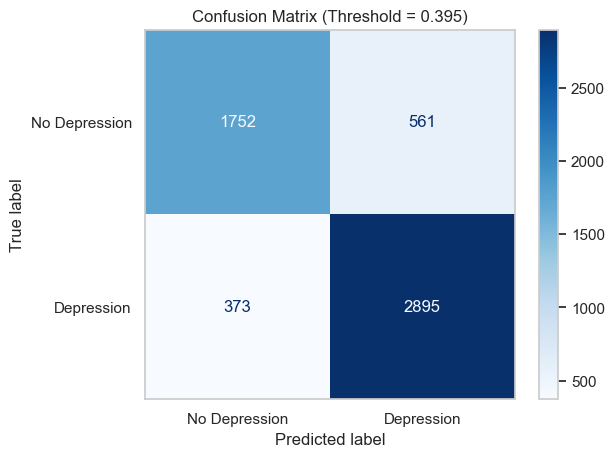

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_039)

print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Depression', 'Depression'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Threshold = 0.395)")
plt.grid(False)
plt.show()


In [21]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


selected_features = [
    'Academic Pressure', 'Work/Study Hours', 'Financial Stress',
    'Dietary Habits', 'Sleep Duration', 'Family History of Mental Illness',
    'Have you ever had suicidal thoughts ?', 'CGPA', 'Gender'
]
X = df[selected_features].copy()
y = df['Depression']


continuous_features = ['Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Sleep Duration', 'CGPA']
categorical_features = ['Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?', 'Gender']

# Creatign a pipeline for continuous features:
# 1. Scaling them using StandardScaler.
# 2. Applying PCA to reduce dimensionality while retaining 95% of the variance.
continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])




# Combining the pipelines using ColumnTransformer.
preprocessor = ColumnTransformer([
    ('cont', continuous_pipeline, continuous_features),
    ('cat', categorical_pipeline, categorical_features)
])

# --- Random Forest Model with PCA ---
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Defining a small hyperparameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [200, 500],
    'rf__max_depth': [None, 15],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 5],
    'rf__bootstrap': [True, False]
}

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Use RandomizedSearchCV for faster tuning on the training set (n_iter=10, cv=3)
rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3,
                               scoring='f1', n_jobs=-4, random_state=42)
rf_search.fit(X_train, y_train)

# Get the best estimator from the search
rf_best = rf_search.best_estimator_

# Evaluate on the test set using the default threshold of 0.5.
y_pred_test = rf_best.predict(X_test)
print("Random Forest with PCA Best Parameters:", rf_search.best_params_)
print("Test Accuracy (Threshold=0.5):", accuracy_score(y_test, y_pred_test))
print("Test F1 Score (Threshold=0.5):", f1_score(y_test, y_pred_test))
print("\nTest Classification Report (Threshold=0.5):")
print(classification_report(y_test, y_pred_test))




Random Forest with PCA Best Parameters: {'rf__n_estimators': 500, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 5, 'rf__max_depth': 15, 'rf__bootstrap': True}
Test Accuracy (Threshold=0.5): 0.8376925833034754
Test F1 Score (Threshold=0.5): 0.8645739910313901

Test Classification Report (Threshold=0.5):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1157
           1       0.85      0.88      0.86      1634

    accuracy                           0.84      2791
   macro avg       0.84      0.83      0.83      2791
weighted avg       0.84      0.84      0.84      2791



In [25]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

# Performing 5-fold cross-validation on the full dataset.
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='f1', n_jobs=-1)

print("5-Fold Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

5-Fold Cross-Validation F1 Scores: [0.846177   0.84814364 0.85164008 0.84794706 0.85498945]
Mean F1 Score: 0.8497794467511474


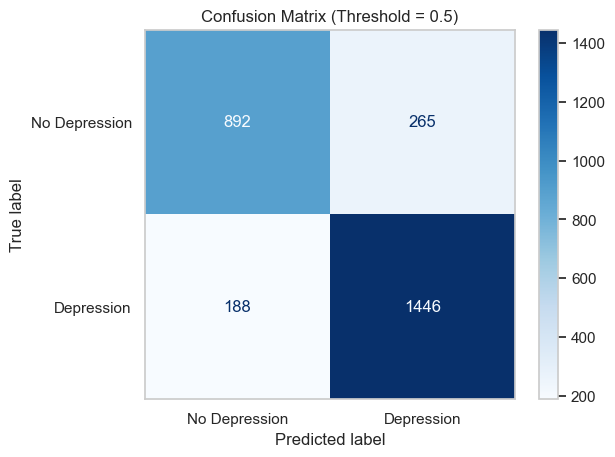

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.grid(False)
plt.show()


In [27]:
# Getting the best Random Forest model from our pipeline
rf_model = rf_best.named_steps['rf']

# Getting feature importances from the Random Forest
importances = rf_model.feature_importances_

# Retrieving the feature names from the preprocessor
feature_names = rf_best.named_steps['preprocessor'].get_feature_names_out()

# Creating a DataFrame for easier viewing
import pandas as pd
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the DataFrame by importance descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print(feat_imp_df)


                                         Feature  Importance
0                                     cont__pca0    0.374590
9   cat__Have you ever had suicidal thoughts ?_1    0.336932
3                                     cont__pca3    0.071886
4                                     cont__pca4    0.066070
2                                     cont__pca2    0.051256
1                                     cont__pca1    0.047733
7                          cat__Dietary Habits_4    0.032210
8        cat__Family History of Mental Illness_1    0.006658
5                          cat__Dietary Habits_2    0.006500
10                              cat__Gender_Male    0.006163
6                          cat__Dietary Habits_3    0.000002


In [28]:
# Accessing the PCA object from the continuous pipeline in the ColumnTransformer:

pca = rf_best.named_steps['preprocessor'].transformers_[0][1].named_steps['pca']

# Get the loadings (components) from PCA.
loadings = pca.components_


feature_names = continuous_features


import pandas as pd
loadings_df = pd.DataFrame(loadings, columns=feature_names)

print("PCA Component Loadings:")
print(loadings_df)


PCA Component Loadings:
   Academic Pressure  Work/Study Hours  Financial Stress  Sleep Duration  \
0           0.629857          0.483705          0.578066       -0.182835   
1          -0.099247          0.119961         -0.077265       -0.465684   
2           0.010947         -0.004103          0.288612        0.831831   
3          -0.217085          0.854750         -0.421988        0.196335   
4           0.739043         -0.145000         -0.631268        0.138635   

       CGPA  
0 -0.041481  
1  0.867714  
2  0.473945  
3 -0.075205  
4  0.122768  


In [29]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


XGBoost Accuracy: 0.8263752015767784
XGBoost F1 Score: 0.8546572671366431
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      2313
           1       0.84      0.87      0.85      3268

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



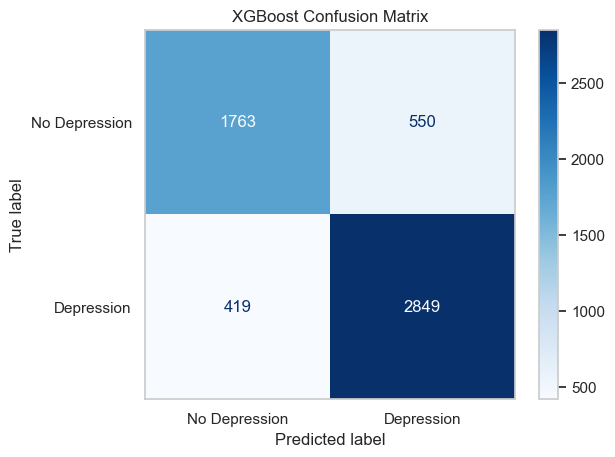

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


selected_features = [
    'Academic Pressure', 'Work/Study Hours', 'Financial Stress',
    'Dietary Habits', 'Sleep Duration', 'Family History of Mental Illness',
    'Have you ever had suicidal thoughts ?', 'CGPA', 'Gender'
]
X = df[selected_features].copy()
y = df['Depression']


continuous_features = ['Academic Pressure', 'Work/Study Hours', 'Financial Stress', 'Sleep Duration', 'CGPA']
categorical_features = ['Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?', 'Gender']


continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])


categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])


preprocessor = ColumnTransformer([
    ('cont', continuous_pipeline, continuous_features),
    ('cat', categorical_pipeline, categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


X_train_transformed = pd.DataFrame(X_train_transformed).astype(float)
X_test_transformed = pd.DataFrame(X_test_transformed).astype(float)


xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='logloss')

xgb_model.fit(X_train_transformed, y_train)


y_pred_xgb = xgb_model.predict(X_test_transformed)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Use your best estimator from the Random Forest pipeline (rf_best) or any model of choice.
cv_scores = cross_val_score(rf_best, X, y, cv=5, scoring='f1', n_jobs=-1)

print("5-Fold Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


5-Fold Cross-Validation F1 Scores: [0.85641639 0.85982156 0.85637504 0.85752769 0.86126994]
Mean CV F1 Score: 0.8582821232997725


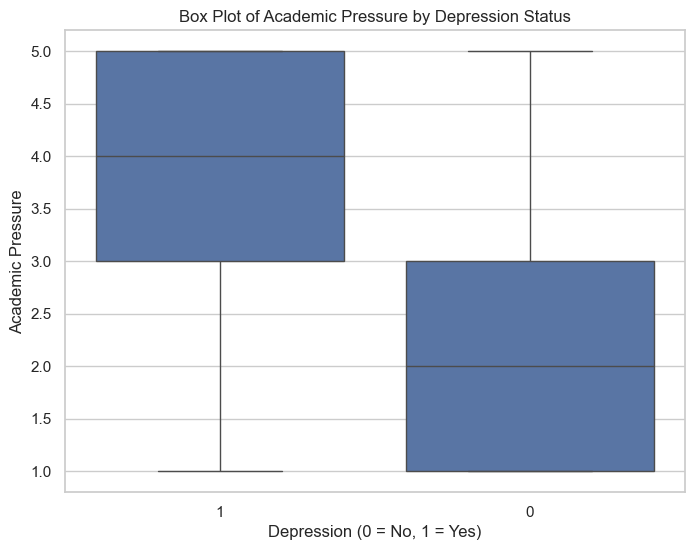

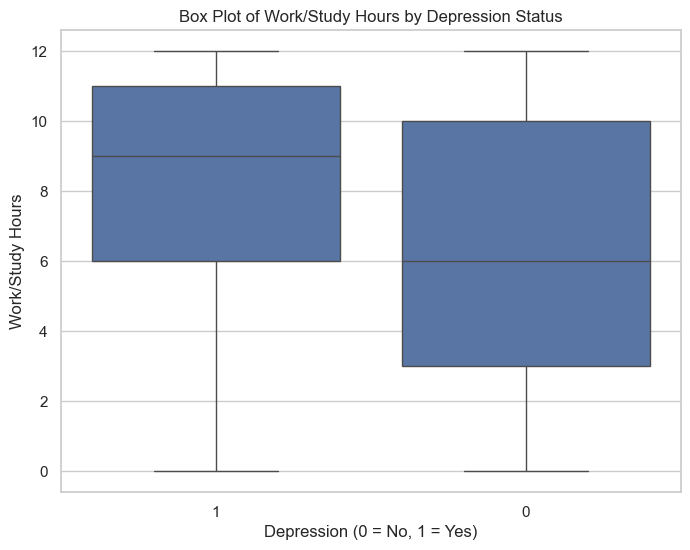

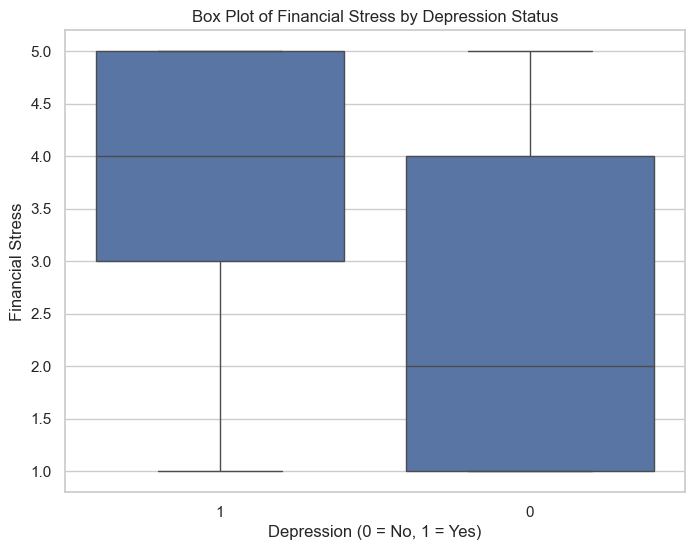

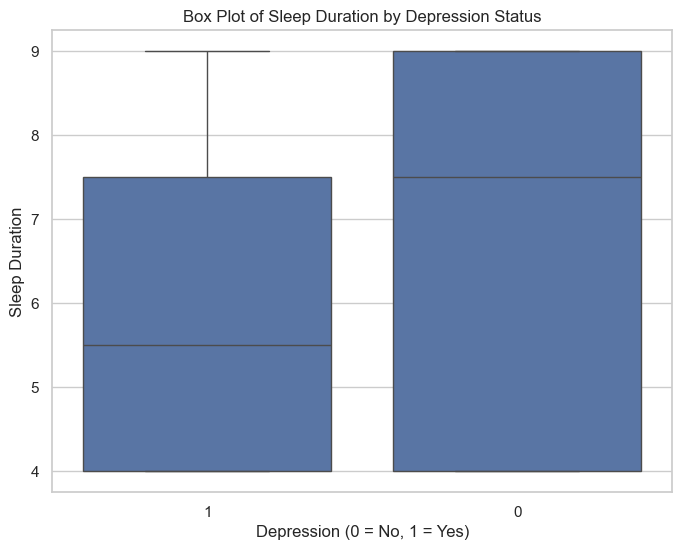

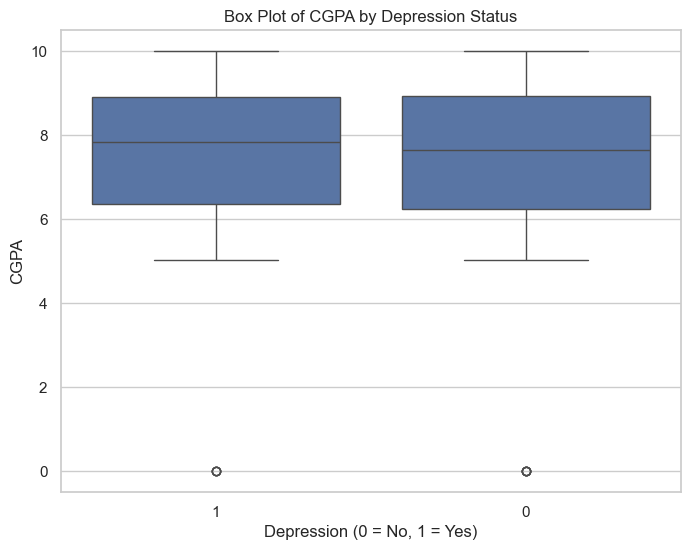

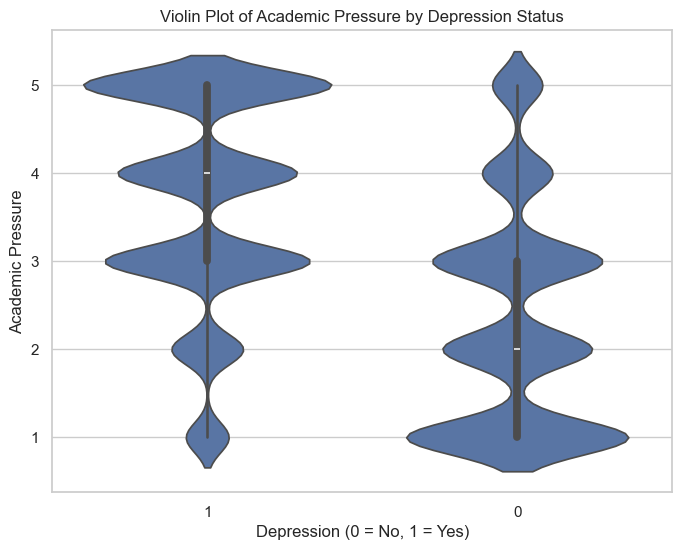

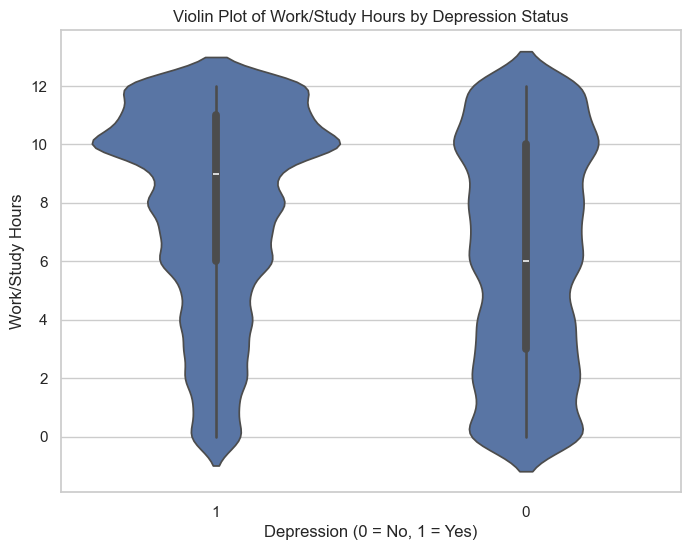

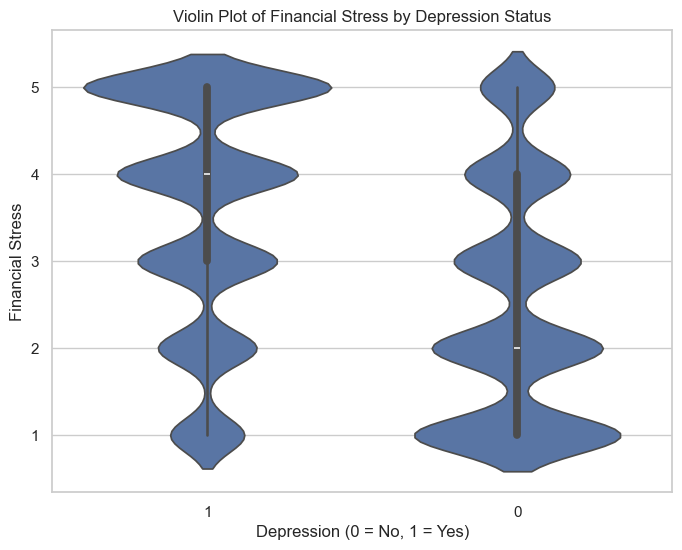

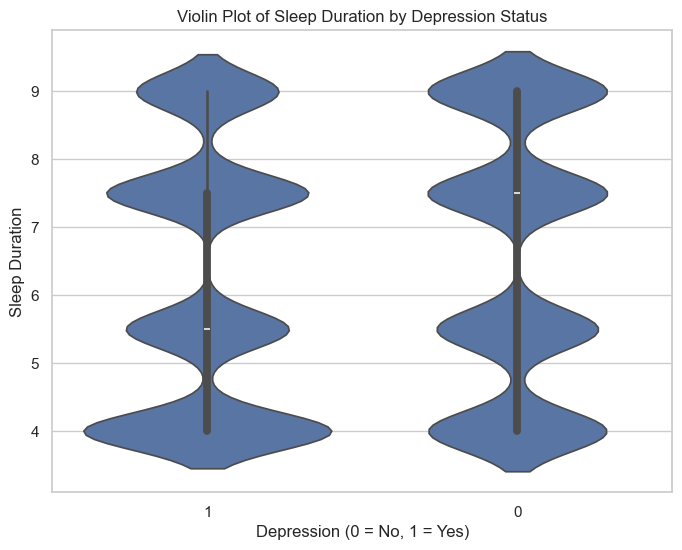

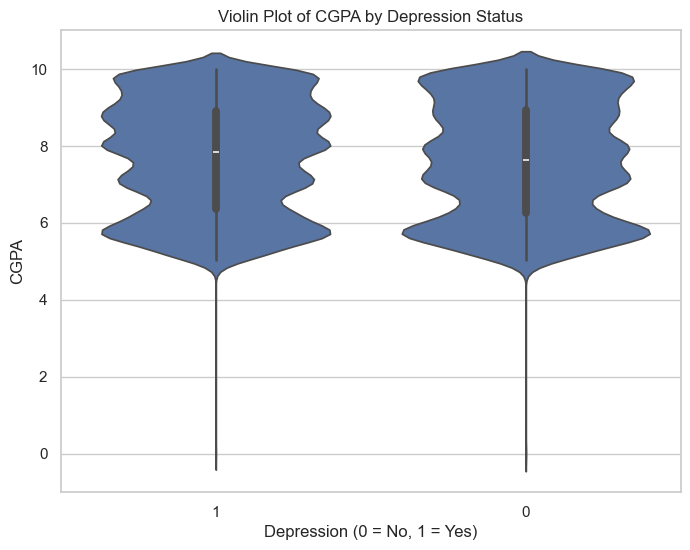

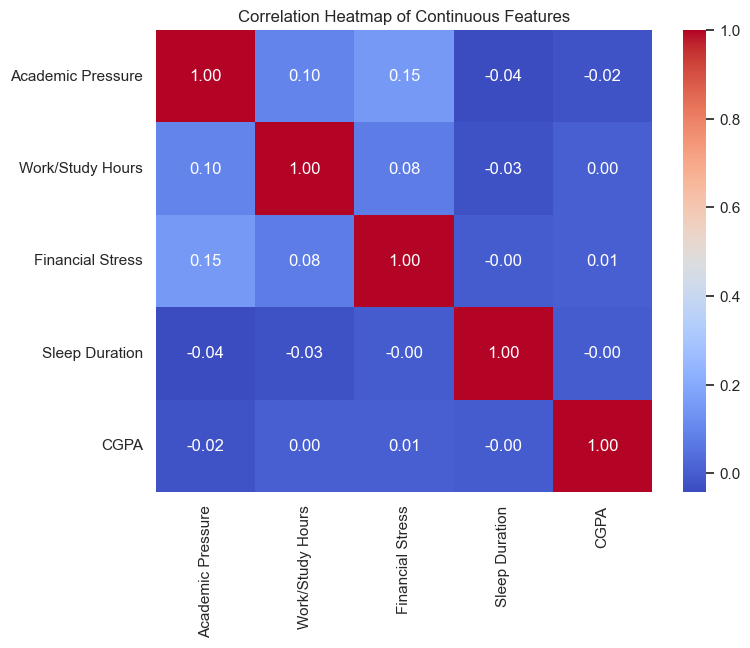

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


df['Depression'] = df['Depression'].astype(str)

# Box Plots: Comparing the distribution of each continuous feature by Depression status.
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Depression', y=feature, data=df)
    plt.title(f"Box Plot of {feature} by Depression Status")
    plt.xlabel("Depression (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

# Violin Plots: Visualizing the full distribution of each continuous feature.
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Depression', y=feature, data=df)
    plt.title(f"Violin Plot of {feature} by Depression Status")
    plt.xlabel("Depression (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

# Heatmap: Correlation heatmap among continuous features.
corr_matrix = df[continuous_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


Optimization terminated successfully.
         Current function value: 0.370841
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                27901
Model:                          Logit   Df Residuals:                    27889
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.4534
Time:                        14:07:55   Log-Likelihood:                -10347.
converged:                       True   LL-Null:                       -18930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                   

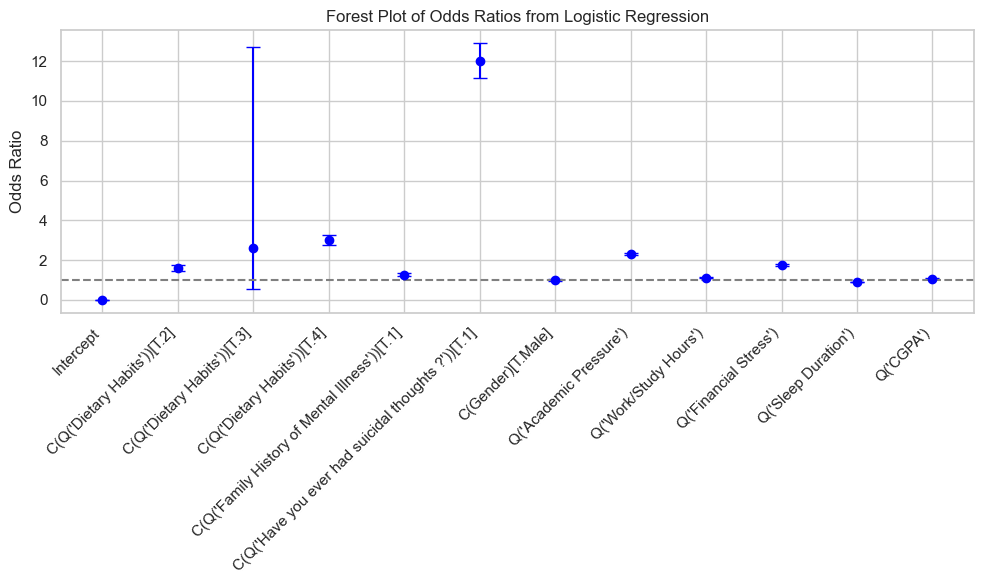

In [34]:
# Forest Plots

# Run cell twice so code works I have no clue why

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


df_copy = df.copy()

df['Depression'] = df['Depression'].astype(int)


formula = ("Depression ~ Q('Academic Pressure') + Q('Work/Study Hours') + Q('Financial Stress') + "
           "C(Q('Dietary Habits')) + Q('Sleep Duration') + C(Q('Family History of Mental Illness')) + "
           "C(Q('Have you ever had suicidal thoughts ?')) + Q('CGPA') + C(Gender)")


model = smf.logit(formula, data=df_copy).fit()
print(model.summary())


params = model.params
conf = model.conf_int()
odds_ratios = np.exp(params)
conf_lower = np.exp(conf[0])
conf_upper = np.exp(conf[1])


or_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Lower CI': conf_lower,
    'Upper CI': conf_upper
})
print(or_df)


plt.figure(figsize=(10, 6))

plt.errorbar(or_df.index, or_df['Odds Ratio'], 
             yerr=[or_df['Odds Ratio'] - or_df['Lower CI'], or_df['Upper CI'] - or_df['Odds Ratio']],
             fmt='o', color='blue', capsize=5)
plt.axhline(1, color='grey', linestyle='--')  
plt.xticks(rotation=45, ha='right')
plt.ylabel('Odds Ratio')
plt.title('Forest Plot of Odds Ratios from Logistic Regression')
plt.tight_layout()
plt.show()


In [ ]:
#Forest plots Results:

#My logistic regression results indicate that several predictors are strongly associated with depression. For instance, the coefficient for Academic Pressure is 0.84 (OR≈2.31), meaning that each unit increase in Academic Pressure roughly doubles the odds of depression. The categorical variable "Have you ever had suicidal thoughts?" shows an extremely strong effect, with an odds ratio of about 12, which implies that respondents who answered "Yes" are much more likely to be depressed. Dietary Habits also play a significant role, particularly category 4 (OR≈3), while Family History of Mental Illness has a modest but significant effect (OR≈1.27). Other predictors like Work/Study Hours and Financial Stress also contribute positively, whereas Sleep Duration shows a negative association, indicating that more sleep is linked to lower odds of depression.